In [3]:
import tensorflow as tf
import numpy as np
import torch

In [4]:
interpreter = tf.lite.Interpreter(model_path="mbv1_1.0_12_90_68.4.tflite")
interpreter.allocate_tensors()

In [5]:
stuff = interpreter.get_tensor_details()

In [6]:
stuff

[{'name': 'Const',
  'index': 0,
  'shape': array([1, 1, 3], dtype=int32),
  'shape_signature': array([1, 1, 3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'ConstantFolding/truediv_recip',
  'index': 1,
  'shape': array([1, 1, 3], dtype=int32),
  'shape_signature': array([1, 1, 3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'float_image_input',
  'index': 2,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'shape_signature': array([  1, 224, 224,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32

In [7]:
weight_tensors_meta = []
weight_tensors = []

for j in range(len(stuff)):
    if "kernel" in stuff[j]['name']:
        weight_tensors_meta.append(stuff[j])
        weight_tensors.append(interpreter.get_tensor(j))
        name = weight_tensors_meta[-1]['name'].split("/")[1]
        print(name, weight_tensors[-1].shape)
        np.save(name + "_kernel.npy",weight_tensors[-1])
#         if "depthwise" not in name:
#             np.save(name + ".npy",weight_tensors[-1].squeeze().transpose())
#         else:
#             np.save(name + ".npy",np.transpose(weight_tensors[-1],[3,0,1,2]))

final_dense (1000, 1024)
initial_conv (32, 3, 3, 3)


In [8]:
bias_tensors_meta = []
bias_tensors = []

for j in range(len(stuff)):
    if "bias" in stuff[j]['name']:
        bias_tensors_meta.append(stuff[j])
        bias_tensors.append(interpreter.get_tensor(j))
        name = bias_tensors_meta[-1]['name'].split("/")[1]
        print(name, bias_tensors[-1].shape)
        
        np.save(name + "_bias.npy",bias_tensors[-1].squeeze())

contraction_1x1_0 (64,)
contraction_1x1_1 (128,)
contraction_1x1_10 (512,)
contraction_1x1_11 (1024,)
contraction_1x1_12 (1024,)
contraction_1x1_2 (128,)
contraction_1x1_3 (256,)
contraction_1x1_4 (256,)
contraction_1x1_5 (512,)
contraction_1x1_6 (512,)
contraction_1x1_7 (512,)
contraction_1x1_8 (512,)
contraction_1x1_9 (512,)
depthwise_nxn_0 (32,)
depthwise_nxn_1 (64,)
depthwise_nxn_10 (512,)
depthwise_nxn_11 (512,)
depthwise_nxn_12 (1024,)
depthwise_nxn_2 (128,)
depthwise_nxn_3 (128,)
depthwise_nxn_4 (256,)
depthwise_nxn_5 (256,)
depthwise_nxn_6 (512,)
depthwise_nxn_7 (512,)
depthwise_nxn_8 (512,)
depthwise_nxn_9 (512,)
final_dense (1000,)
initial_conv (32,)


In [9]:
weight_tensors_meta = []
weight_tensors = []

for j in range(len(stuff)):
    if "weight" in stuff[j]['name']:
        weight_tensors_meta.append(stuff[j])
        weight_tensors.append(interpreter.get_tensor(j))
        name = weight_tensors_meta[-1]['name'].split("/")[1]
        print(name, weight_tensors[-1].shape)
        if "depthwise" not in name:
            np.save(name + ".npy",weight_tensors[-1].squeeze().transpose())
        else:
            np.save(name + ".npy",np.transpose(weight_tensors[-1],[3,0,1,2]))

contraction_1x1_0 (64, 1, 1, 32)
contraction_1x1_1 (128, 1, 1, 64)
contraction_1x1_10 (512, 1, 1, 512)
contraction_1x1_11 (1024, 1, 1, 512)
contraction_1x1_12 (1024, 1, 1, 1024)
contraction_1x1_2 (128, 1, 1, 128)
contraction_1x1_3 (256, 1, 1, 128)
contraction_1x1_4 (256, 1, 1, 256)
contraction_1x1_5 (512, 1, 1, 256)
contraction_1x1_6 (512, 1, 1, 512)
contraction_1x1_7 (512, 1, 1, 512)
contraction_1x1_8 (512, 1, 1, 512)
contraction_1x1_9 (512, 1, 1, 512)
depthwise_nxn_0 (1, 3, 3, 32)
depthwise_nxn_1 (1, 3, 3, 64)
depthwise_nxn_10 (1, 3, 3, 512)
depthwise_nxn_11 (1, 3, 3, 512)
depthwise_nxn_12 (1, 3, 3, 1024)
depthwise_nxn_2 (1, 3, 3, 128)
depthwise_nxn_3 (1, 3, 3, 128)
depthwise_nxn_4 (1, 3, 3, 256)
depthwise_nxn_5 (1, 3, 3, 256)
depthwise_nxn_6 (1, 3, 3, 512)
depthwise_nxn_7 (1, 3, 3, 512)
depthwise_nxn_8 (1, 3, 3, 512)
depthwise_nxn_9 (1, 3, 3, 512)


In [10]:
test = torch.Tensor(weight_tensors[1].squeeze().transpose())

In [11]:
a = weight_tensors[2].squeeze().transpose()

In [12]:
a = a[np.argsort([len(i) for i in [np.where(a[j])[0] for j in range(512)]])]

In [13]:
for i in range(512):
    print(np.where(a[i]))

(array([182, 195, 218, 387, 388, 419, 459, 494, 500]),)
(array([ 29,  30, 142, 160, 211, 275, 393, 482, 496]),)
(array([  0,  30,  69,  87, 101, 222, 223, 235, 365, 392, 399, 459, 476,
       481, 486]),)
(array([ 53,  92, 145, 168, 176, 222, 305, 335, 338, 356, 361, 365, 371,
       386, 437, 456]),)
(array([  7,  30,  55, 102, 117, 195, 199, 220, 235, 259, 361, 382, 399,
       447, 475, 482, 486]),)
(array([ 30,  50, 101, 102, 140, 199, 220, 229, 259, 361, 378, 384, 385,
       396, 419, 433, 451, 483, 486]),)
(array([ 10,  57,  64,  89, 136, 209, 242, 269, 274, 277, 287, 352, 368,
       371, 387, 440, 464, 485, 488, 504]),)
(array([  7,  30,  55, 117, 166, 195, 199, 220, 222, 235, 238, 289, 361,
       365, 382, 399, 430, 447, 482, 486]),)
(array([  1,  13,  27,  74,  87,  99, 125, 166, 195, 199, 223, 248, 250,
       295, 311, 347, 361, 393, 408, 446, 447]),)
(array([  3,  40,  55, 101, 117, 140, 199, 220, 222, 235, 238, 242, 259,
       289, 360, 365, 378, 384, 399, 430, 477, 48

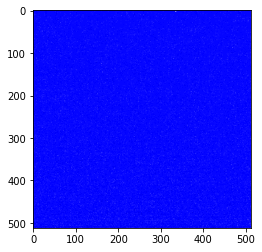

In [15]:
from matplotlib import pyplot as plt
plt.imshow(a,cmap='seismic')


In [16]:
depthwise_filters = torch.Tensor(weight_tensors[13]).permute(3,0,1,2)
groupwise_filters = torch.Tensor(weight_tensors[0]).permute(0,3,1,2)
depthwise_bias = torch.Tensor(bias_tensors[13])
groupwise_bias = torch.Tensor(bias_tensors[0])

In [17]:
bias_tensors[13][10]

1.0047193

In [18]:
import torch
import torch.nn as nn

In [19]:
input_image = torch.Tensor(np.random.normal(size=(1,32,112,112)))

intermediate = torch.nn.functional.conv2d(input_image, depthwise_filters, bias=depthwise_bias, stride=1, padding=1, dilation=1, groups=32)
intermediate = torch.nn.functional.relu(intermediate)
result_2 = torch.nn.functional.linear(torch.squeeze(intermediate).permute(1,2,0).contiguous().view(-1,32).unsqueeze(0),torch.squeeze(groupwise_filters),bias=None)
result_1 = torch.nn.functional.conv2d(intermediate,groupwise_filters,bias=groupwise_bias,stride=1,padding=0,dilation=1,groups=1)
result_2 = torch.nn.functional.relu(result_2)
result_1 = torch.nn.functional.relu(result_1)

In [20]:
torch.sum(result_1) - torch.sum(result_2)

tensor(-244732.1250)

In [21]:
np.save("input_image.npy",input_image.squeeze().data.numpy())
np.save("depthwise_filters.npy",depthwise_filters.squeeze().data.numpy())
np.save("result.npy",np.transpose(result_2.squeeze().data.numpy()))

In [22]:
test = result_2.squeeze().data.numpy()

In [23]:
test = np.transpose(test)

In [24]:
test[61,12543]

0.0

In [25]:
intermediate.squeeze()[0]

tensor([[0.0000, 0.0000, 0.3040,  ..., 2.2609, 0.0000, 0.0000],
        [0.0000, 1.3347, 0.0000,  ..., 0.2815, 0.0000, 0.0000],
        [0.0000, 2.0518, 1.3580,  ..., 0.0000, 0.2512, 0.6886],
        ...,
        [0.0000, 0.7660, 0.0000,  ..., 0.0000, 0.2608, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.3600, 0.0000],
        [0.0000, 0.0000, 0.4504,  ..., 0.0000, 1.6944, 0.0000]])

In [26]:
input_image.shape

torch.Size([1, 32, 112, 112])

In [27]:
result_1

tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 19.8134, 13.5648],
          [ 5.7291,  8.8512,  4.2717,  ...,  0.0000,  0.0000,  0.8412],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 6.9844,  7.7192, 10.2029,  ...,  2.8344,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 11.2763,  2.8516],
          [ 0.0000,  1.9442,  3.9518,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 5.6540,  3.1753,  0.0000,  ...,  3.1482, 19.1304,  7.0041],
          [12.0660,  8.5424,  0.0000,  ..., 29.8114,  1.5001, 32.8166],
          [ 2.6337,  0.0000, 22.7237,  ...,  5.6212,  1.4927,  0.0000],
          ...,
          [17.1824,  0.0000, 19.6525,  ...,  0.6974, 25.8888,  1.9489],
          [12.8794, 10.1453,  1.3928,  ...,  0.0000,  5.0084, 19.9068],
          [17.8158,  8.2872, 11.8273,  ...,  5.0671,  3.9004,  0.0000]],

         [[ 0.0000,  1.4320,  0.0000,  ...,  0.0000,  2.7396,  0.0000],
          [ 3.7909,  3.1810,  

In [28]:
padded_in = torch.nn.functional.pad(input_image,(8,8,1,1))
np.save("padded_input_image.npy",padded_in.squeeze().data.numpy())
padded_out = torch.nn.functional.pad(result_1,(8,8,1,1))
np.save("padded_result.npy",padded_out.squeeze().data.numpy())

In [29]:
padded_in.shape

torch.Size([1, 32, 114, 128])

In [30]:
result_1

tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 19.8134, 13.5648],
          [ 5.7291,  8.8512,  4.2717,  ...,  0.0000,  0.0000,  0.8412],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 6.9844,  7.7192, 10.2029,  ...,  2.8344,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 11.2763,  2.8516],
          [ 0.0000,  1.9442,  3.9518,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 5.6540,  3.1753,  0.0000,  ...,  3.1482, 19.1304,  7.0041],
          [12.0660,  8.5424,  0.0000,  ..., 29.8114,  1.5001, 32.8166],
          [ 2.6337,  0.0000, 22.7237,  ...,  5.6212,  1.4927,  0.0000],
          ...,
          [17.1824,  0.0000, 19.6525,  ...,  0.6974, 25.8888,  1.9489],
          [12.8794, 10.1453,  1.3928,  ...,  0.0000,  5.0084, 19.9068],
          [17.8158,  8.2872, 11.8273,  ...,  5.0671,  3.9004,  0.0000]],

         [[ 0.0000,  1.4320,  0.0000,  ...,  0.0000,  2.7396,  0.0000],
          [ 3.7909,  3.1810,  

In [31]:
a = torch.Tensor(np.random.normal(size=(1,3,224,224)))

In [ ]:
m = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)

In [ ]:
a.shape

In [ ]:
m(a).shape

In [ ]:
m1 = nn.MaxPool2d(3,2)

In [ ]:
m1(m(a)).shape